# KMeans Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('../data/bank-full.csv')

In [3]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


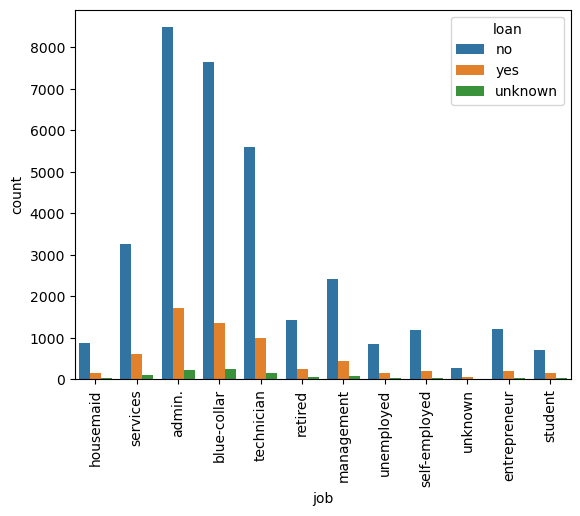

In [35]:
sns.countplot(df,x='job',hue='loan')
plt.xticks(rotation=90);

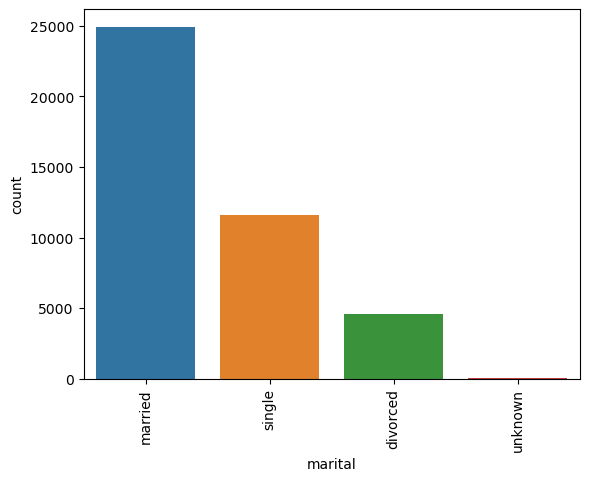

In [7]:
sns.countplot(df,x='marital')
plt.xticks(rotation=90);

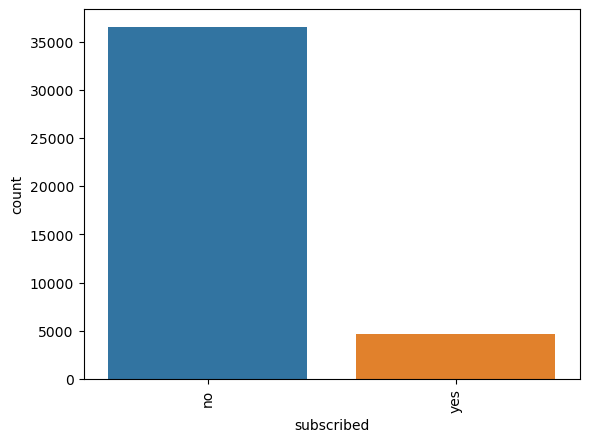

In [9]:
sns.countplot(df,x='subscribed')
plt.xticks(rotation=90);

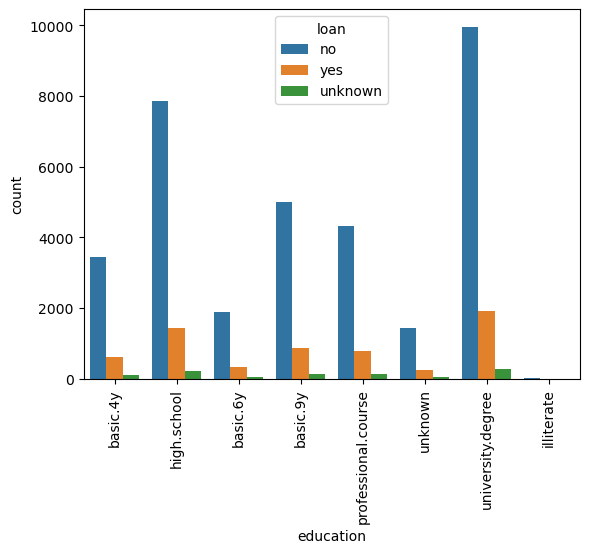

In [37]:
sns.countplot(df,x='education',hue='loan')
plt.xticks(rotation=90);

### MinMaxScaler is a data preprocessing technique used to scale numerical features to a given range. It rescales the data such that all feature values are within a specified range, typically between 0 and 1.

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
x=pd.get_dummies(df,drop_first=True)

In [15]:
scaler=MinMaxScaler()

In [16]:
scaled_x=scaler.fit_transform(x)

In [17]:
from sklearn.cluster import KMeans

In [18]:
kmean=KMeans(n_clusters=6,n_init=10)

In [19]:
pred=kmean.fit_predict(scaled_x)

/Users/arvindramesh/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### adding prediction into the dataset and finding relation between label column and other features.

In [25]:
x['labels']=pred

<AxesSubplot: >

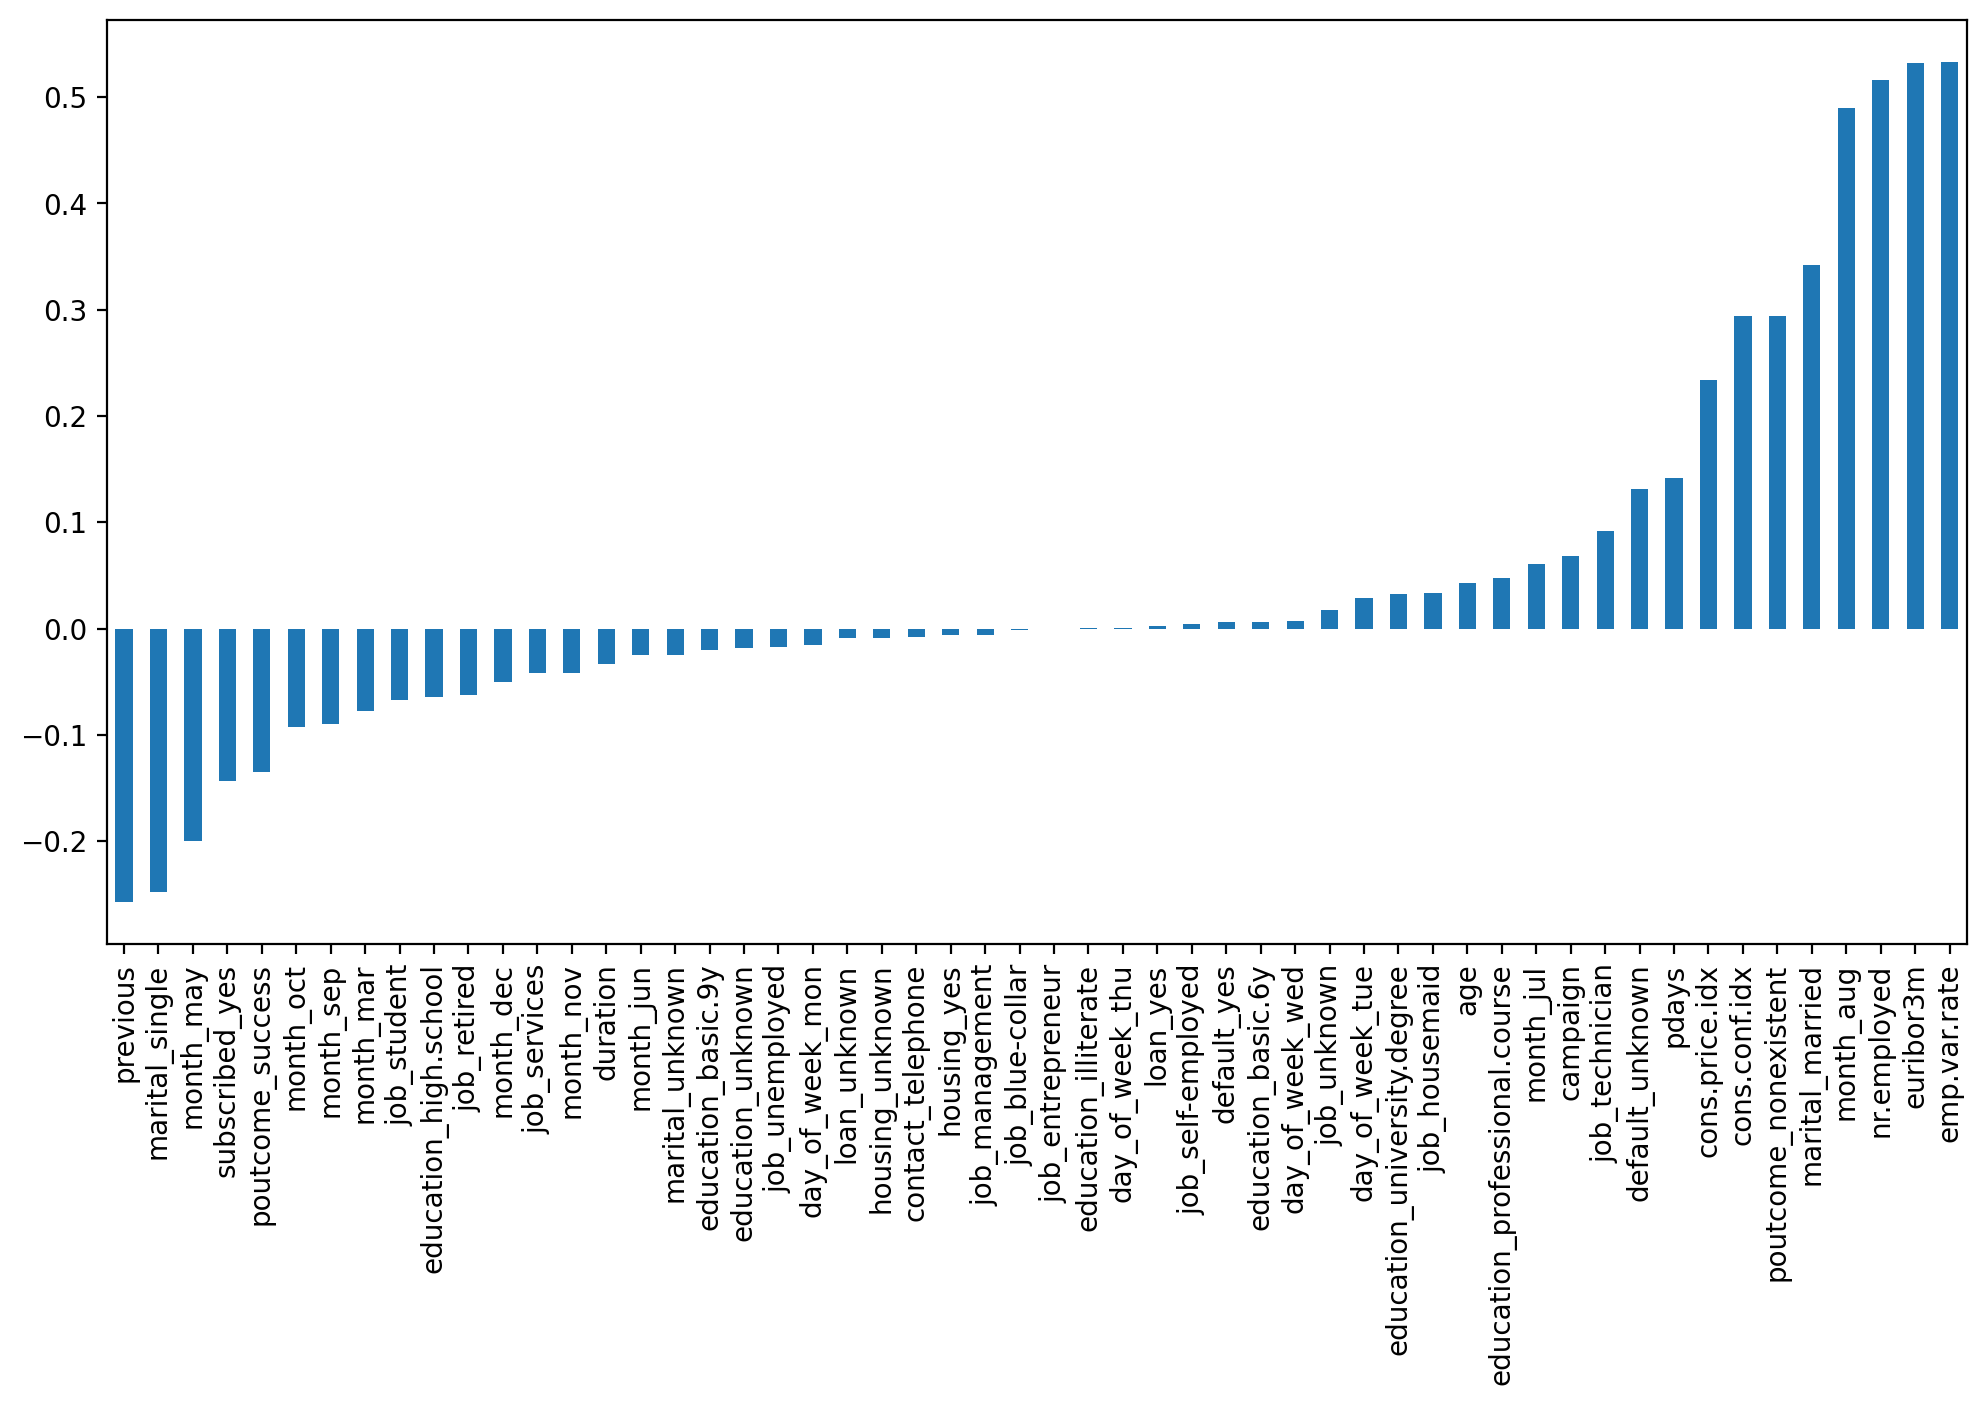

In [27]:
plt.figure(figsize=(12,6),dpi=200)
x.corr()['labels'].iloc[:-1].sort_values().plot(kind='bar')

### finding best cluster value.

In [22]:
ssd=[]
for i in range(1,30):
    kmean=KMeans(n_clusters=i,n_init=10)
    kmean.fit(scaled_x)
    ssd.append(kmean.inertia_)

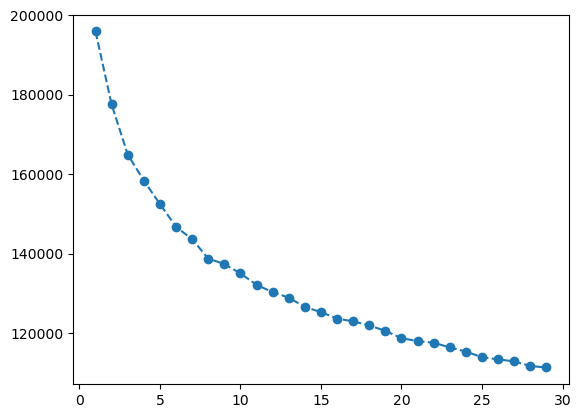

In [28]:
plt.plot(range(1,30),ssd,'o--')

In [32]:
ssd[:10]

[195909.10834420382,
 177554.9543339024,
 164956.2371974279,
 158400.24801071011,
 152489.57025635292,
 146771.72355163505,
 143628.47450324037,
 138790.0499687302,
 137384.15647690906,
 135036.04993317864]

In [33]:
pd.Series(ssd[:10]).diff()

0             NaN
1   -18354.154010
2   -12598.717136
3    -6555.989187
4    -5910.677754
5    -5717.846705
6    -3143.249048
7    -4838.424535
8    -1405.893492
9    -2348.106544
dtype: float64

<AxesSubplot: >

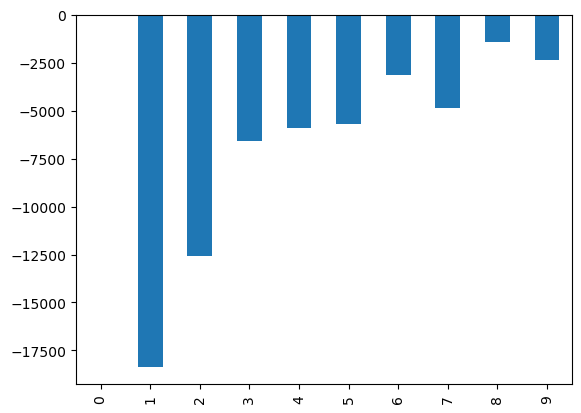

In [34]:
pd.Series(ssd[:10]).diff().plot(kind='bar')

### from this plot we can see that ssd dropped at 6 and again rised at 7 so the best cluster value will be 6.